In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# 1 data cleaning 
# 2 EDA
# 3 Text Preprocessing 
# 4 Model Building 
# 5 Evaluation 
# 6 Improvements 
# 7 Website 
# Deployement 


## Data Cleaning 

In [5]:
# drop last 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate value 
df.duplicated().sum()

np.int64(403)

In [13]:
# remove duplicate 
df=df.drop_duplicates(keep='first')

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.shape

(5169, 2)

## EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

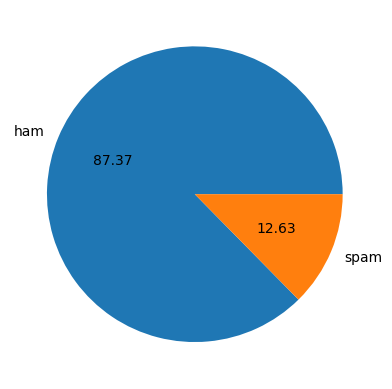

In [17]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
## Data is imbalanced 

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushbishnoi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
## numbers of Words 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# for ham messages 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# for ham messages 
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

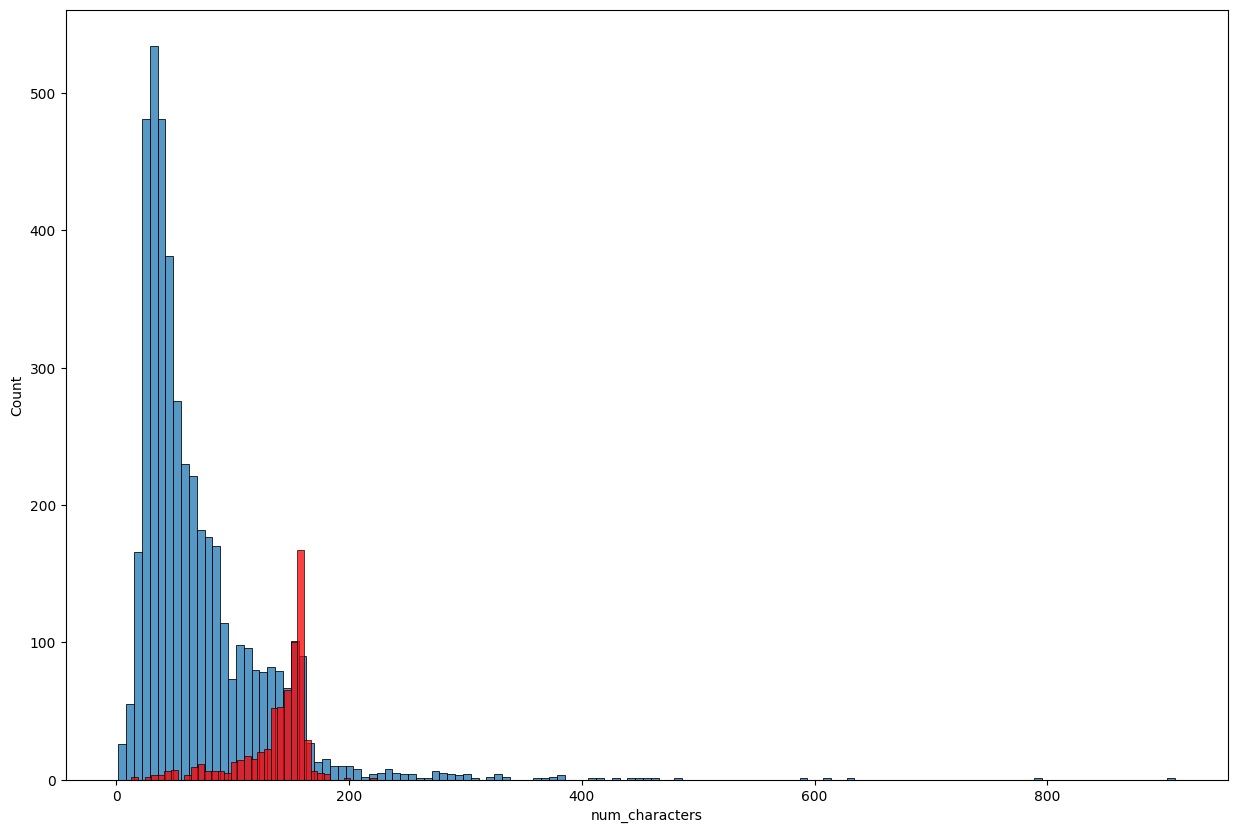

In [32]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

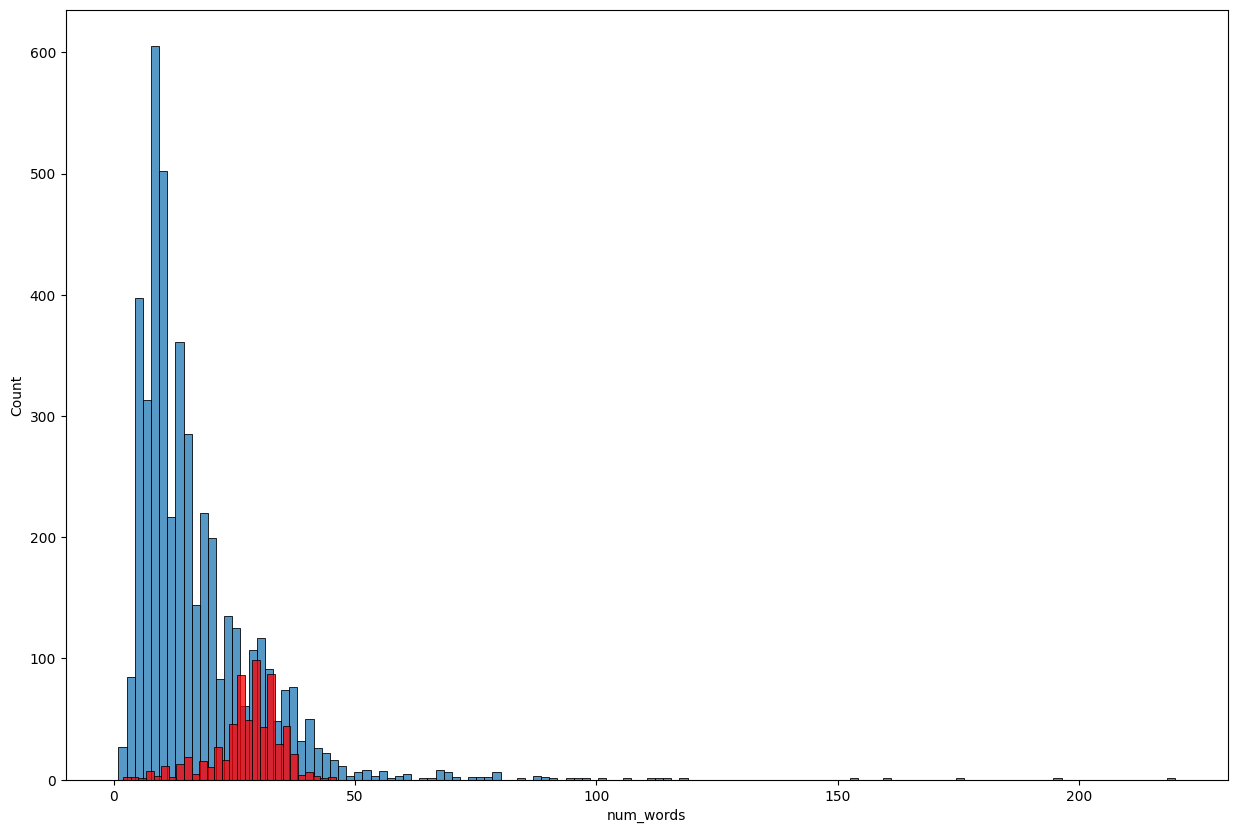

In [33]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

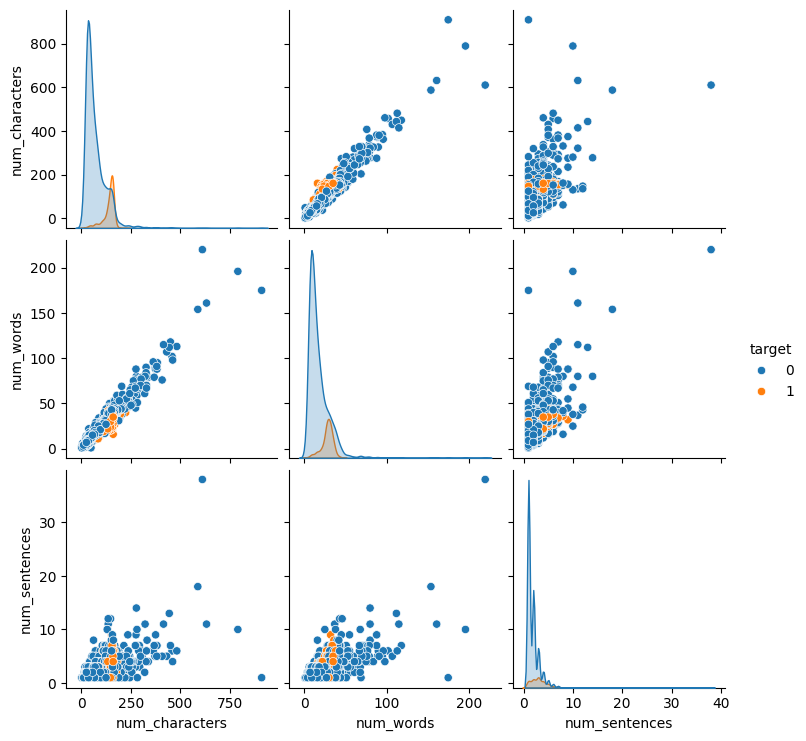

In [34]:
sns.pairplot(df,hue='target')

## Text preprocessing 
### : Lower Case 
### : Tokenization 
### : removing special charcters 
### : removing stopwords 
### : Stemming or lemmatization 

In [35]:
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushbishnoi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushbishnoi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayushbishnoi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text: 
        y.append(lemmatizer.lemmatize(i))
    return " ".join(y)

In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
df['transformed_text']=df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [48]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud

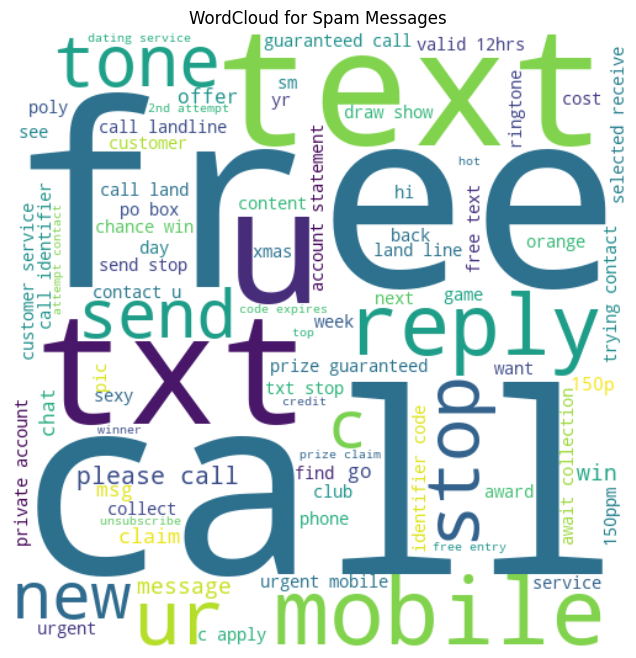

In [53]:
import matplotlib.pyplot as plt

# Create a WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate word cloud from spam text
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
wc = wc.generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Spam Messages")
plt.show()

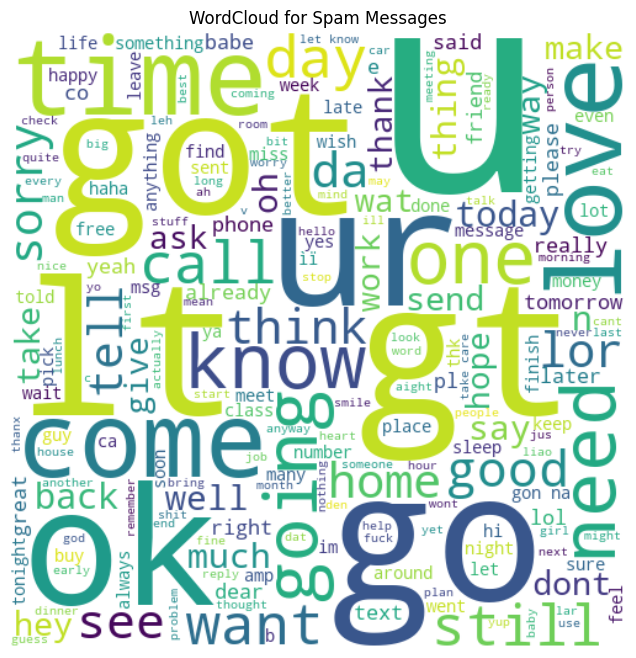

In [55]:


# Create a WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate word cloud from spam text
spam_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
wc = wc.generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Spam Messages")
plt.show()

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [60]:
spam_corpus=[]
for message in df[df['target']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)


In [61]:
len(spam_corpus)

9939

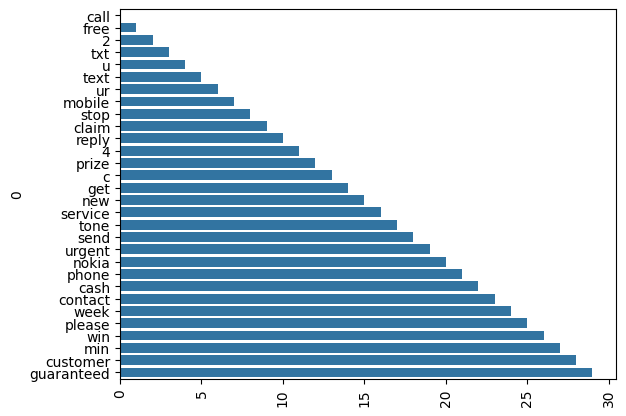

In [69]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

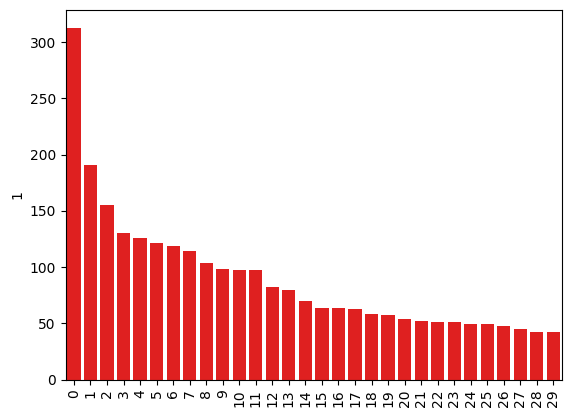

In [70]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color="red")
plt.xticks(rotation='vertical')
plt.show()

In [71]:
ham_corpus=[]
for message in df[df['target']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)


In [72]:
len(ham_corpus)

35404

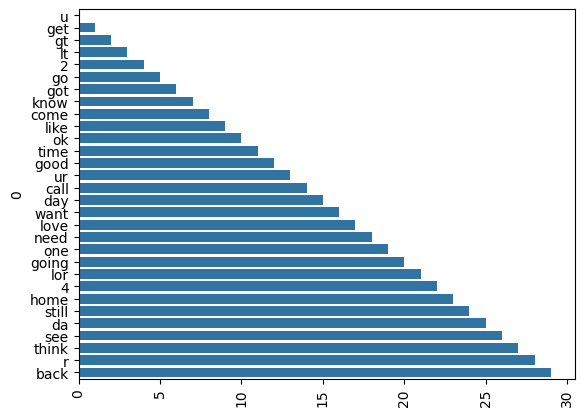

In [73]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

## Model Building 

### 1 Naive Bayes

In [87]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [88]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [89]:
X.shape

(5169, 7493)

In [90]:
y=df['target'].values

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [92]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8887814313346228
[[807  89]
 [ 26 112]]
0.5572139303482587


In [94]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9535783365570599
[[896   0]
 [ 48  90]]
1.0


In [95]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9690522243713733
[[893   3]
 [ 29 109]]
0.9732142857142857


In [96]:
## tfidf --> mnb 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [99]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [102]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9738878143133463, 0.9743589743589743)

In [104]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743
For  KN
Accuracy -  0.8974854932301741
Precision -  1.0
For  NB
Accuracy -  0.9535783365570599
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8490566037735849
For  LR
Accuracy -  0.9429400386847195
Precision -  0.9072164948453608
For  RF
Accuracy -  0.971953578336557
Precision -  0.9823008849557522
For  AdaBoost
Accuracy -  0.9264990328820116
Precision -  0.8604651162790697
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8721804511278195
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.875
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [105]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [106]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.897485,1.000000
2,NB,0.953578,1.000000
8,ETC,0.974855,0.982759
5,RF,0.971954,0.982301
0,SVC,0.973888,0.974359
10,xgb,0.974855,0.951613
4,LR,0.942940,0.907216
9,GBDT,0.947776,0.875000
7,BgC,0.962282,0.872180
6,AdaBoost,0.926499,0.860465


In [107]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [108]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.897485
1,NB,Accuracy,0.953578
2,ETC,Accuracy,0.974855
3,RF,Accuracy,0.971954
4,SVC,Accuracy,0.973888
5,xgb,Accuracy,0.974855
6,LR,Accuracy,0.942940
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.962282
9,AdaBoost,Accuracy,0.926499


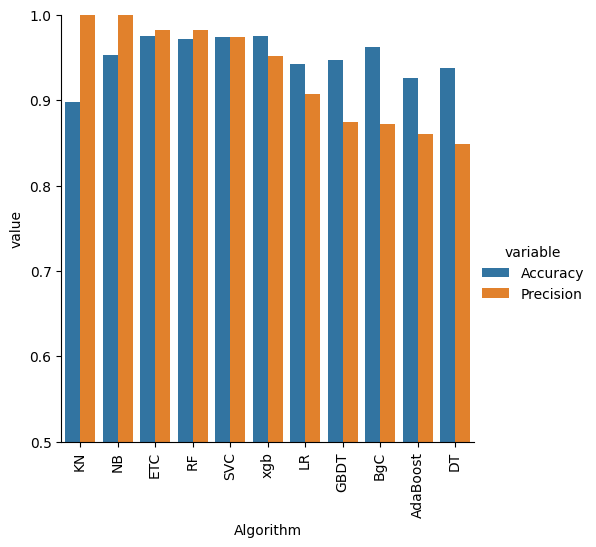

In [109]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [110]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [112]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [113]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [114]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [115]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [116]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.897485,1.000000,0.897485,1.000000,0.897485,1.000000,0.897485,1.000000
1,NB,0.953578,1.000000,0.953578,1.000000,0.953578,1.000000,0.953578,1.000000
2,ETC,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,RF,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301
4,SVC,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359
5,xgb,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613
6,LR,0.942940,0.907216,0.942940,0.907216,0.942940,0.907216,0.942940,0.907216
7,GBDT,0.947776,0.875000,0.947776,0.875000,0.947776,0.875000,0.947776,0.875000
8,BgC,0.962282,0.872180,0.962282,0.872180,0.962282,0.872180,0.962282,0.872180
9,AdaBoost,0.926499,0.860465,0.926499,0.860465,0.926499,0.860465,0.926499,0.860465


In [117]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [118]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [119]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [120]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.991304347826087


In [121]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [122]:
from sklearn.ensemble import StackingClassifier


In [123]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [124]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9185185185185185


In [125]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))